**Objective**: To build a linear regression model for the prediction of mpg of cars using the mtcars.csv dataset.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn

In [2]:
data = pd.read_csv("mtcars.csv")
data.head()

,model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


### Technical Specification of cars:
**cyl**: This represents the number of cylinders in the car's engine. It's an important factor in determining an engine's power and performance.

**disp**: Short for "displacement," it measures the engine's total piston volume. It is often expressed in cubic inches (CID) or cubic centimeters (cc) and is a key indicator of an engine's size and power.

**hp**: This stands for "horsepower," which quantifies the engine's ability to do work. It's a crucial measure of a car's engine performance and power output.

**drat**: The "drat" value usually refers to the rear axle ratio. It indicates how many times the driveshaft must rotate to turn the rear wheels once. A higher value typically implies better acceleration but lower top speed.

**wt**: This is the car's weight, often measured in pounds or kilograms. Weight is a critical factor in a vehicle's performance and fuel efficiency.

**qsec**: Short for "quarter mile time," it measures how long it takes for a car to complete a quarter-mile drag race. This is an indicator of a car's acceleration and speed capabilities.

**vs**: Stands for "v/s," which typically represents the type of engine setup, such as V-shaped or inline engines. It can also refer to "vapor separator," which is part of a fuel system.

**am**: Refers to "automatic" or "manual" transmission. It indicates whether the car has an automatic or manual gearbox.

**gear**: The number of forward gears in the car's transmission. More gears often provide a better balance between fuel efficiency and performance.

**carb**: Short for "carburetor," it denotes the type and configuration of the carburetion system in the engine. Carburetors are less common in modern vehicles due to fuel injection technology.

**mpg**: This represents "miles per gallon," which is a measure of a car's fuel efficiency. It tells you how many miles a car can travel on one gallon of fuel.

In [3]:
data.shape

(32, 12)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   model   32 non-null     object 
 1   mpg     32 non-null     float64
 2   cyl     32 non-null     int64  
 3   disp    32 non-null     float64
 4   hp      32 non-null     int64  
 5   drat    32 non-null     float64
 6   wt      32 non-null     float64
 7   qsec    32 non-null     float64
 8   vs      32 non-null     int64  
 9   am      32 non-null     int64  
 10  gear    32 non-null     int64  
 11  carb    32 non-null     int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


In [5]:
data.isnull().any()

model    False
mpg      False
cyl      False
disp     False
hp       False
drat     False
wt       False
qsec     False
vs       False
am       False
gear     False
carb     False
dtype: bool

In [6]:
data.isnull().sum()

model    0
mpg      0
cyl      0
disp     0
hp       0
drat     0
wt       0
qsec     0
vs       0
am       0
gear     0
carb     0
dtype: int64

In [7]:
features = data.iloc[:, 2:] # data.iloc[select all row(:), select column 2 to last column(2:)]
predictions = data.iloc[:, 1]

In [8]:
features.head()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [9]:
predictions.head()

0    21.0
1    21.0
2    22.8
3    21.4
4    18.7
Name: mpg, dtype: float64

In [10]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, predictions, test_size=0.2, random_state=42, shuffle=True)

In [11]:
train_data = pd.concat([x_train, y_train], axis='columns',
                       names=['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'mpg'])

In [12]:
train_data

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
25,4,79.0,66,4.08,1.935,18.90,1,1,4,1,27.3
12,8,275.8,180,3.07,3.730,17.60,0,0,3,3,17.3
0,6,160.0,110,3.90,2.620,16.46,0,1,4,4,21.0
4,8,360.0,175,3.15,3.440,17.02,0,0,3,2,18.7
16,8,440.0,230,3.23,5.345,17.42,0,0,3,4,14.7
5,6,225.0,105,2.76,3.460,20.22,1,0,3,1,18.1
13,8,275.8,180,3.07,3.780,18.00,0,0,3,3,15.2
11,8,275.8,180,3.07,4.070,17.40,0,0,3,3,16.4
23,8,350.0,245,3.73,3.840,15.41,0,0,3,4,13.3
1,6,160.0,110,3.90,2.875,17.02,0,1,4,4,21.0


In [13]:
test_data = pd.concat([x_test, y_test], axis='columns',
                       names=['cyl', 'disp', 'hp', 'drat', 'wt', 'qsec', 'vs', 'am', 'gear', 'carb', 'mpg'])

In [14]:
test_data

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
29,6,145.0,175,3.62,2.770,15.50,0,1,5,6,19.7
15,8,460.0,215,3.00,5.424,17.82,0,0,3,4,10.4
24,8,400.0,175,3.08,3.845,17.05,0,0,3,2,19.2
17,4,78.7,66,4.08,2.200,19.47,1,1,4,1,32.4
8,4,140.8,95,3.92,3.150,22.90,1,0,4,2,22.8
9,6,167.6,123,3.92,3.440,18.30,1,0,4,4,19.2
30,8,301.0,335,3.54,3.570,14.60,0,1,5,8,15.0


In [15]:
train_data.describe()

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
count,25.000000,25.00000,25.00000,25.000000,25.00000,25.000000,25.000000,25.0,25.000000,25.000000,25.000000
mean,6.160000,227.60000,140.40000,3.597200,3.14212,17.820800,0.440000,0.4,3.600000,2.520000,20.168000
std,1.818424,120.28601,62.33779,0.569828,0.97597,1.498771,0.506623,0.5,0.707107,1.194432,5.935326
min,4.000000,71.10000,52.00000,2.760000,1.51300,14.500000,0.000000,0.0,3.000000,1.000000,10.400000
25%,4.000000,120.30000,97.00000,3.080000,2.46500,16.900000,0.000000,0.0,3.000000,2.000000,15.500000
50%,6.000000,225.00000,113.00000,3.700000,3.21500,17.600000,0.000000,0.0,3.000000,2.000000,18.700000
75%,8.000000,318.00000,180.00000,3.920000,3.57000,18.900000,1.000000,1.0,4.000000,4.000000,22.800000
max,8.000000,472.00000,264.00000,4.930000,5.34500,20.220000,1.000000,1.0,5.000000,4.000000,33.900000


In [16]:
corr_mat = train_data.corr(method='pearson')
corr_mat

,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb,mpg
cyl,1.000000,0.910631,0.863941,-0.674297,0.801661,-0.563880,-0.803252,-0.623250,-0.596247,0.612344,-0.861952
disp,0.910631,1.000000,0.879044,-0.672173,0.890991,-0.481155,-0.708556,-0.647623,-0.583985,0.559313,-0.867513
hp,0.863941,0.879044,1.000000,-0.447063,0.722935,-0.708559,-0.724839,-0.442482,-0.359200,0.695468,-0.806484
drat,-0.674297,-0.672173,-0.447063,1.000000,-0.707299,-0.020498,0.366717,0.795269,0.773709,-0.071234,0.677420
wt,0.801661,0.890991,0.722935,-0.707299,1.000000,-0.198645,-0.572634,-0.735866,-0.656642,0.561967,-0.877575
qsec,-0.563880,-0.481155,-0.708559,-0.020498,-0.198645,1.000000,0.766659,-0.116651,-0.165205,-0.667773,0.412895
vs,-0.803252,-0.708556,-0.724839,0.366717,-0.572634,0.766659,1.000000,0.263181,0.279145,-0.669282,0.658913
am,-0.623250,-0.647623,-0.442482,0.795269,-0.735866,-0.116651,0.263181,1.000000,0.824958,-0.153490,0.678424
gear,-0.596247,-0.583985,-0.359200,0.773709,-0.656642,-0.165205,0.279145,0.824958,1.000000,-0.039467,0.614341
carb,0.612344,0.559313,0.695468,-0.071234,0.561967,-0.667773,-0.669282,-0.153490,-0.039467,1.000000,-0.597634


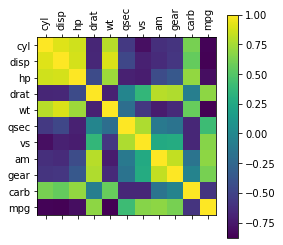

In [17]:
# Visualize the correlation matrix
plt.matshow(corr_mat)
plt.xticks(range(len(corr_mat.columns)), corr_mat.columns, rotation=90)
plt.yticks(range(len(corr_mat.columns)), corr_mat.columns)
plt.colorbar()
plt.show()

[]

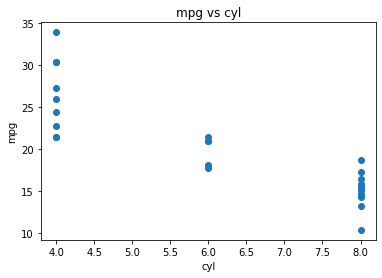

In [18]:
plt.scatter(x_train['cyl'], y_train)
plt.title("mpg vs cyl")
plt.xlabel("cyl")
plt.ylabel("mpg")
plt.plot()

[]

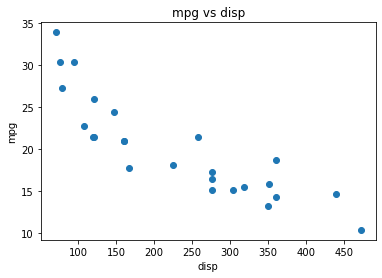

In [19]:
plt.scatter(x_train['disp'], y_train)
plt.title("mpg vs disp")
plt.xlabel("disp")
plt.ylabel("mpg")
plt.plot()

[]

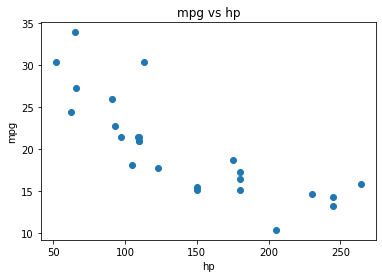

In [20]:
plt.scatter(x_train['hp'], y_train)
plt.title("mpg vs hp")
plt.xlabel("hp")
plt.ylabel("mpg")
plt.plot()

[]

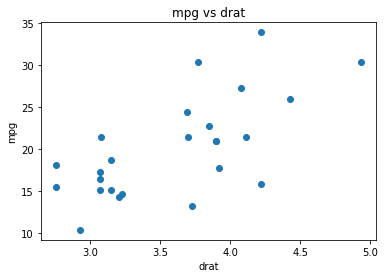

In [21]:
plt.scatter(x_train['drat'], y_train)
plt.title("mpg vs drat")
plt.xlabel("drat")
plt.ylabel("mpg")
plt.plot()

[]

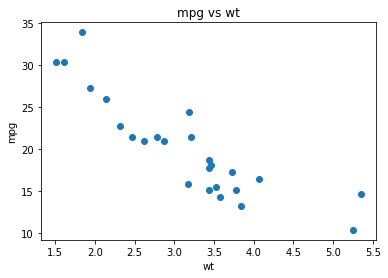

In [22]:
plt.scatter(x_train['wt'], y_train)
plt.title("mpg vs wt")
plt.xlabel("wt")
plt.ylabel("mpg")
plt.plot()

[]

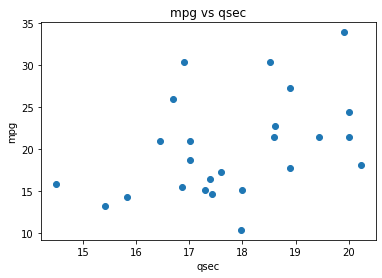

In [23]:
plt.scatter(x_train['qsec'], y_train)
plt.title("mpg vs qsec")
plt.xlabel("qsec")
plt.ylabel("mpg")
plt.plot()

[]

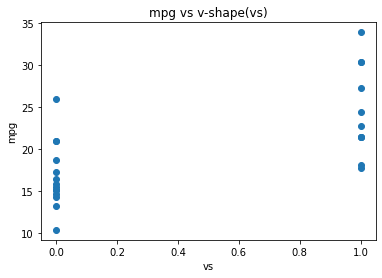

In [24]:
plt.scatter(x_train['vs'], y_train)
plt.title("mpg vs v-shape(vs)")
plt.xlabel("vs")
plt.ylabel("mpg")
plt.plot()

[]

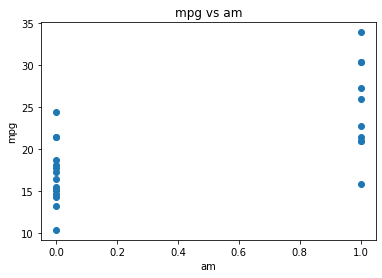

In [25]:
plt.scatter(x_train['am'], y_train)
plt.title("mpg vs am")
plt.xlabel("am")
plt.ylabel("mpg")
plt.plot()

[]

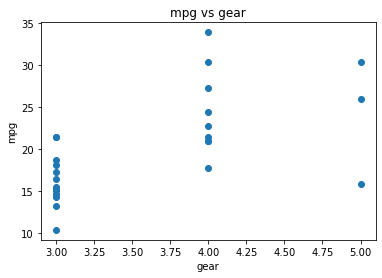

In [26]:
plt.scatter(x_train['gear'], y_train)
plt.title("mpg vs gear")
plt.xlabel("gear")
plt.ylabel("mpg")
plt.plot()

[]

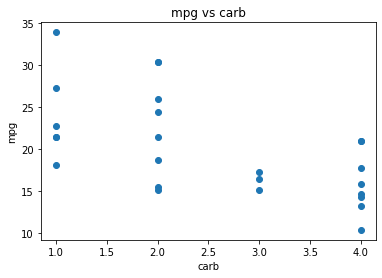

In [27]:
plt.scatter(x_train['carb'], y_train)
plt.title("mpg vs carb")
plt.xlabel("carb")
plt.ylabel("mpg")
plt.plot()

In [28]:
# Model Building: Training and Testing
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [29]:
y_pred_train

array([27.39049768, 15.70105242, 21.87895895, 17.56562387, 10.3566258 ,
       20.02980825, 16.19433136, 13.67976942, 12.68424241, 21.6700726 ,
       25.02876011, 26.62459558, 20.66251034, 15.97812991, 26.7722456 ,
       17.31748831, 29.3183077 , 23.26753774, 24.53060883, 23.27102515,
       19.40590412, 12.37227519, 18.32622956, 29.72279449, 14.45060462])

In [30]:
y_pred_test

array([19.83092709, 10.98714165, 16.3140211 , 27.14590717, 28.61321199,
       18.30133293, 14.88251095])

In [31]:
# Evaluate the model using commonly used metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse_train = mean_squared_error(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

# Print the evaluation metrics on train data
print("Evaluation metrics: Train Data")
print("Mean absolute error: ", mae_train)
print("Mean squared error : ", mse_train)
print("R-squared score    : ", r2_train)

Evaluation metrics: Train Data
Mean absolute error:  1.6932642245436293
Mean squared error :  4.225736165556229
R-squared score    :  0.8750483703126839


In [32]:
mse_test = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

# Print the evaluation metrics on train data
print("Evaluation metrics: Test Data")
print("Mean absolute error: ", mae_test)
print("Mean squared error : ", mse_test)
print("R-squared score    : ", r2_test)

Evaluation metrics: Test Data
Mean absolute error:  2.241072653667489
Mean squared error :  10.130154667787266
R-squared score    :  0.7466453084791007


In [33]:
print("Model coefficients    : ", model.coef_)
print("Corresponding features: ", features.columns.values)

Model coefficients    :  [-0.4762499   0.01831107 -0.00950031  1.00213048 -4.86203707  1.84095198
 -1.93718579  1.07662425  1.32710759  0.14713125]
Corresponding features:  ['cyl' 'disp' 'hp' 'drat' 'wt' 'qsec' 'vs' 'am' 'gear' 'carb']


In [34]:
def predict_mpg():
    cyl  = int(input("Enter cyl(int) in range(4-10):"))
    disp = float(input("Enter disp(float) in range(50-500):"))
    hp   = float(input("Enter hp(float) in range(50-400):"))
    drat = float(input("Enter drat(float) in range(2-5) :"))
    wt   = float(input("Enter wt(float) in range(1-6):"))
    qsec = float(input("Enter qsec(float) in range(10-25):"))
    vs   = int(input("Enter vs(int) in range(0,1):"))
    am   = int(input("Enter am(int) in range(0,1):"))
    gear = int(input("Enter gear(int) in range(3-5):"))
    carb = int(input("Enter carb(int) in range(1-8):"))

    new_data = pd.DataFrame({
        'cyl' : [cyl],
        'disp': [disp],
        'hp'  : [hp],
        'drat': [drat],
        'wt'  : [wt],
        'qsec': [qsec],
        'vs'  : [vs],
        'am'  : [am],
        'gear': [gear],
        'carb': [carb]
    })
    pred_mpg = model.predict(new_data)
    print("Input features:\n", new_data)
    print("Predicted mpg :", pred_mpg)

predict_mpg()

Input features:
    cyl   disp     hp  drat   wt  qsec  vs  am  gear  carb
0    5  455.0  250.0   3.0  5.0  21.0   1   0     4     6
Predicted mpg : [19.59174062]
